In [1]:
#Step1: Importing libraries and reading Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Real estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [2]:
df.shape

(414, 8)

In [3]:
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
#STEP 2: SEPARATING ATTRIBUTE AND FEATURES
X=df.drop(['No','Y house price of unit area'], axis=1)#Features and should be at least 2D
Y=df['Y house price of unit area']

In [5]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [6]:
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [7]:
# Backing up data for multiple goals
X1=X.copy()
Y1=Y.copy()
X2=X.copy()
Y2=Y.copy()
X3=X.copy()
Y3=Y.copy()

# 1. Data Pre-Processing

In [8]:
#Sudocode for Normalization
"""from pandas.core.dtypes.common import is_numeric_dtype
for col in X1.columns:
    if is_numeric_dtype(X1[col]):
        maxval=X1[col].max()
        minval=X1[col].min()
        def normalizer(n):
            stdn=(n-minval)/(maxval-minval)
            return stdn
        X1[col]=X1[col].apply(normalizer)
    else:
        continue
X1.head()"""

#Sudocode for Standardization
from pandas.core.dtypes.common import is_numeric_dtype
for col in X1.columns:
    if is_numeric_dtype(X1[col]):
        meanval=X1[col].mean()
        stdvs=X1[col].std()
        def standardizer(n):
            stdn=(n-meanval)/stdvs
            return stdn
        X1[col]=X1[col].apply(standardizer)
    else:
        continue
X1.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.822688,1.254111,-0.791537,2.004982,1.124070,0.448220
1,-0.822688,0.156896,-0.615866,1.665488,0.911342,0.400654
2,1.539289,-0.387322,-0.413515,0.307513,1.485063,0.687352
3,1.244928,-0.387322,-0.413515,0.307513,1.485063,0.687352
4,-1.120595,-1.115873,-0.549332,0.307513,0.833180,0.592220


**TRAIN TEST SPLIT- 70-30**

In [9]:
#Step 3: Importing Train Test Split
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=101)

In [10]:
X1_train

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
266,0.358300,0.007675,0.554068,-0.371475,-0.138602,-1.205504
298,0.652661,-0.088880,2.375490,-1.389957,-2.214314,-1.925506
274,0.063940,0.859114,-0.546599,0.986500,0.323921,0.428672
355,0.358300,-1.221205,-0.554645,0.307513,0.952437,0.687352
321,-0.822688,-0.071324,-0.094394,-0.031981,1.586593,0.048798
...,...,...,...,...,...,...
63,1.539289,-1.326538,-0.436103,-0.031981,0.436732,0.931045
326,1.244928,-1.194872,-0.814043,0.986500,-0.933915,0.244274
337,-1.120595,1.192667,-0.382713,0.307513,-0.025791,0.856764
11,0.652661,-1.001762,-0.787118,1.665488,0.427062,0.634573


# 2. Linear regression

In [11]:
#STEP 4: LOADING REGRESSION MODEL AND RUNNING REGRESSION ON TRAINING SET. 
from sklearn.linear_model import LinearRegression
reg_mod=LinearRegression()
reg_mod.fit(X1_train,Y1_train)

LinearRegression()

In [12]:
reg_mod.coef_

array([ 1.36451307, -3.1300751 , -5.28648258,  3.47938928,  3.00803702,
        0.35911081])

In [13]:
reg_mod.intercept_

38.404808563637275

# Regression Equation:

**Y=38.4048+1.36451307 X1-3.1300751 X2-5.28648258 X3 +3.47938928 X4 + 3.00803702 X5 + 0.35911081 X6**

In [14]:
pred=reg_mod.predict(X1_test)
pred

array([12.63830383, 10.0304461 , 22.98807375, 48.50264837, 32.67140451,
       37.82572669, 36.09178068, 41.05953639, 47.84830793, 40.4574746 ,
       45.0361603 , 32.86533457, 40.48623576, 36.48827849, 44.30595729,
       46.59668235, 38.42798244, 44.26307337, 48.81959723, 45.50409246,
       42.23260833, 54.6526397 , 48.07373298, 37.48194231, 33.57091525,
       48.26293154, 40.23479801, 50.42675437, 47.22333423, 38.99458517,
       48.11033139, 40.47035604, 45.61060308, 43.98441528, 46.54336092,
        8.18725886, 38.08375879, 39.82608171,  8.5339677 , 55.72740213,
       32.17950939, 49.72698264, 24.85604948, 47.64473233, 41.23026871,
       51.17703175, 42.04716292, 37.32689765, 44.24427856, 36.27028988,
       47.55408451, 34.74054504, 43.53329366, 15.95586215, 38.29001222,
       48.93912385, 44.69790471, 44.91934627, 45.33972278, 41.33035787,
       34.39899173, 44.02303164, 41.99940522, 43.9553153 , 53.61420366,
       44.24994361, 24.68926603, 47.06140631, 31.22031534, 40.49

In [15]:
Y1_test

176    19.2
347    11.2
307    24.7
299    46.1
391    31.3
       ... 
16     70.1
31     25.0
36     22.9
41     18.2
24     38.8
Name: Y house price of unit area, Length: 125, dtype: float64

In [16]:
# Step 5 Checking Model Performance
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [17]:
MSE=mean_squared_error(Y1_test, pred)
MSE

46.21179783494892

In [18]:
R2_val=r2_score(Y1_test, pred)
R2_val

0.650905847998566

# 3. Linear regression without Scaling

In [19]:
X2.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [20]:
Y2

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.3, random_state=101)

In [22]:
X2_train.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
266,2013.250,17.8,1783.1800,3,24.96731,121.51486
298,2013.333,16.7,4082.0150,0,24.94155,121.50381
274,2013.167,27.5,394.0173,7,24.97305,121.53994
355,2013.250,3.8,383.8624,5,24.98085,121.54391
321,2012.917,16.9,964.7496,4,24.98872,121.53411


In [23]:
Y2_train.head()

266    23.7
298    16.7
274    41.0
355    60.7
321    37.7
Name: Y house price of unit area, dtype: float64

In [24]:
from sklearn.linear_model import LinearRegression
us_reg_mod=LinearRegression()
us_reg_mod.fit(X2_train,Y2_train)

LinearRegression()

In [25]:
uspred=us_reg_mod.predict(X2_test)
uspred

array([12.63830383, 10.0304461 , 22.98807375, 48.50264837, 32.67140451,
       37.82572669, 36.09178068, 41.05953639, 47.84830793, 40.4574746 ,
       45.0361603 , 32.86533457, 40.48623576, 36.48827849, 44.30595729,
       46.59668235, 38.42798244, 44.26307337, 48.81959723, 45.50409246,
       42.23260833, 54.6526397 , 48.07373298, 37.48194231, 33.57091525,
       48.26293154, 40.23479801, 50.42675437, 47.22333423, 38.99458517,
       48.11033139, 40.47035604, 45.61060308, 43.98441528, 46.54336092,
        8.18725886, 38.08375879, 39.82608171,  8.5339677 , 55.72740213,
       32.17950939, 49.72698264, 24.85604948, 47.64473233, 41.23026871,
       51.17703175, 42.04716292, 37.32689765, 44.24427856, 36.27028988,
       47.55408451, 34.74054504, 43.53329366, 15.95586215, 38.29001222,
       48.93912385, 44.69790471, 44.91934627, 45.33972278, 41.33035787,
       34.39899173, 44.02303164, 41.99940522, 43.9553153 , 53.61420366,
       44.24994361, 24.68926603, 47.06140631, 31.22031534, 40.49

In [26]:
Y2_test

176    19.2
347    11.2
307    24.7
299    46.1
391    31.3
       ... 
16     70.1
31     25.0
36     22.9
41     18.2
24     38.8
Name: Y house price of unit area, Length: 125, dtype: float64

In [27]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
usMSE=mean_squared_error(Y2_test, uspred)
usR2=r2_score(Y2_test, uspred)

In [28]:
usMSE

46.2117978349365

In [29]:
usR2

0.6509058479986598

In [30]:
MSE-usMSE

1.2420287021086551e-11

In [31]:
R2_val-usR2

-9.381384558082573e-14

**Scaling worsen results a little bit**

# 4. Visualization via Scatterplot

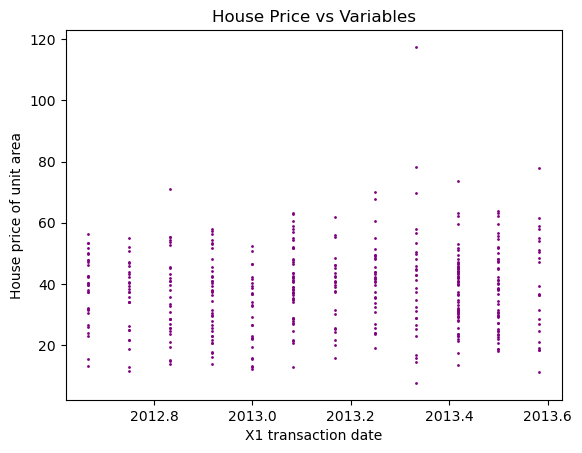

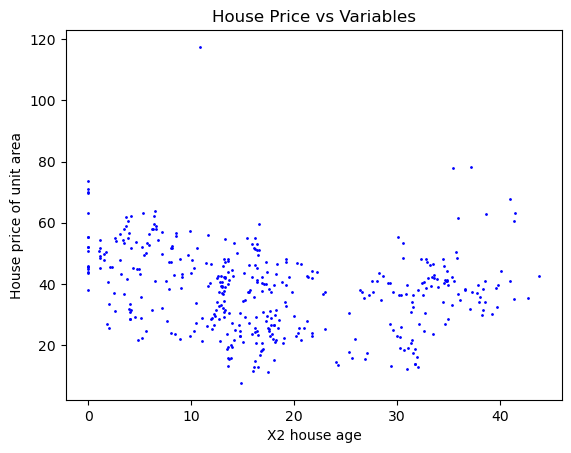

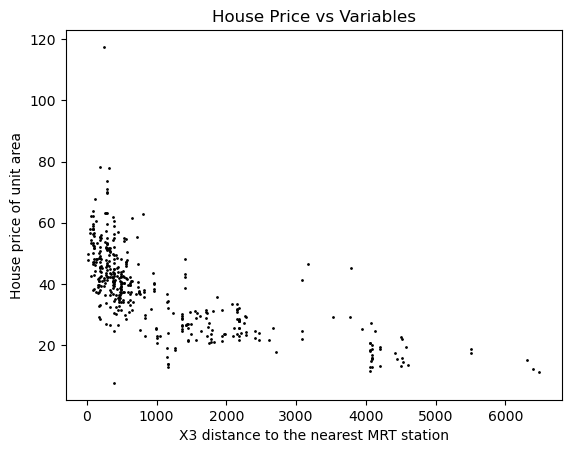

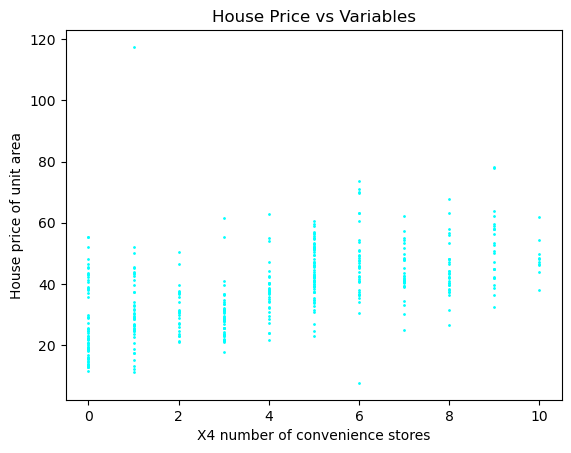

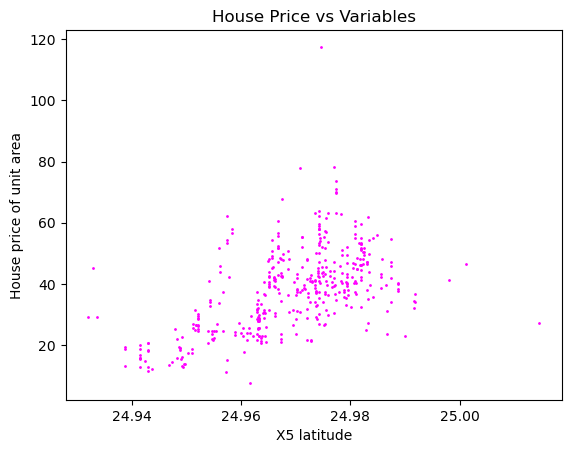

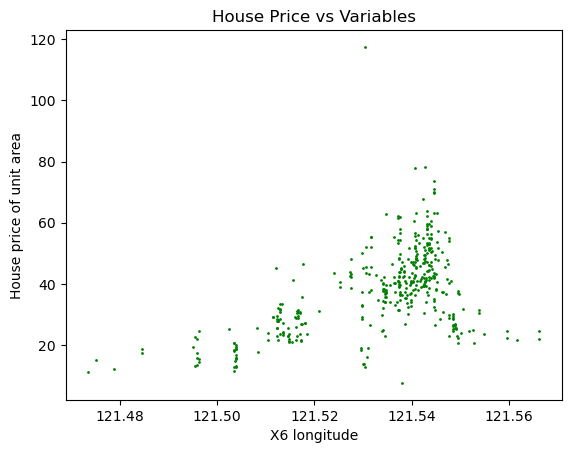

In [32]:
import random
colset=["red","green","blue","pink","black","orange","purple","brown","cyan","magenta"]
for feature in X3.columns:
    plt.scatter(x=X3.loc[:,feature],y=Y3,marker='o', s=1, c=random.choice(colset))
    plt.xlabel(feature)
    plt.ylabel('House price of unit area')
    plt.title('House Price vs Variables')
    plt.show()

**Comments on Visualization**

1. House price per unit area flactuated a little over the time period
2. House price per unit area as seen from the figure decreased as age of a house increased
3. The nearer a house is to a MRT station, the higher the per unit price of the house
4. The price per unit area of house also increases as noumber of nearby convenience store increases
5. Longitude and Latitude value although considered in this model, in practical scenario is of less or no importance.

# 5 Min-Max scaling and Regression

In [33]:
X3.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [34]:
Y3

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

In [35]:
X4=X3.copy()
Y4=Y3.copy()
#Minimax Scaling or Normalization
from pandas.core.dtypes.common import is_numeric_dtype
for col in X4.columns:
    if is_numeric_dtype(X4[col]):
        maxval=X4[col].max()
        minval=X4[col].min()
        def normalizer(n):
            stdn=(n-minval)/(maxval-minval)
            return stdn
        X4[col]=X4[col].apply(normalizer)
    else:
        continue
X4.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,0.272926,0.730594,0.009513,1.0,0.616941,0.719323
1,0.272926,0.445205,0.043809,0.9,0.584949,0.711451
2,1.000000,0.303653,0.083315,0.5,0.671231,0.758896
3,0.909389,0.303653,0.083315,0.5,0.671231,0.758896
4,0.181223,0.114155,0.056799,0.5,0.573194,0.743153


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.3, random_state=101)
minmx_reg_mod=LinearRegression()
minmx_reg_mod.fit(X4_train,Y4_train)

LinearRegression()

In [37]:
minmxpred=minmx_reg_mod.predict(X4_test)
minmxpred

array([12.63830383, 10.0304461 , 22.98807375, 48.50264837, 32.67140451,
       37.82572669, 36.09178068, 41.05953639, 47.84830793, 40.4574746 ,
       45.0361603 , 32.86533457, 40.48623576, 36.48827849, 44.30595729,
       46.59668235, 38.42798244, 44.26307337, 48.81959723, 45.50409246,
       42.23260833, 54.6526397 , 48.07373298, 37.48194231, 33.57091525,
       48.26293154, 40.23479801, 50.42675437, 47.22333423, 38.99458517,
       48.11033139, 40.47035604, 45.61060308, 43.98441528, 46.54336092,
        8.18725886, 38.08375879, 39.82608171,  8.5339677 , 55.72740213,
       32.17950939, 49.72698264, 24.85604948, 47.64473233, 41.23026871,
       51.17703175, 42.04716292, 37.32689765, 44.24427856, 36.27028988,
       47.55408451, 34.74054504, 43.53329366, 15.95586215, 38.29001222,
       48.93912385, 44.69790471, 44.91934627, 45.33972278, 41.33035787,
       34.39899173, 44.02303164, 41.99940522, 43.9553153 , 53.61420366,
       44.24994361, 24.68926603, 47.06140631, 31.22031534, 40.49

In [38]:
Y4_test

176    19.2
347    11.2
307    24.7
299    46.1
391    31.3
       ... 
16     70.1
31     25.0
36     22.9
41     18.2
24     38.8
Name: Y house price of unit area, Length: 125, dtype: float64

In [39]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
minmxMSE=mean_squared_error(Y4_test, minmxpred)
minmxR2=r2_score(Y4_test, minmxpred)

In [40]:
minmxMSE

46.2117978349489

In [41]:
minmxR2

0.6509058479985661

In [45]:
usMSE-minmxMSE

-1.2398970739013748e-11

In [46]:
usR2-minmxR2

9.370282327836321e-14

In [44]:
# Positive difference in MSE and Negative Difference in R2 indicates better model:
# Greater R2 is prefered and Samller MSE is Prefered

**Scaling worsen the results a little bit**

# Summary

**Performance:**

1.Features on different scales can distort the loss function landscape and slow down convergence of optimization algorithms like gradient descent. Scaling features to a standard range (e.g. 0-1) helps the optimizer treat all features evenly.

2.By standardizing the variable scales, feature scaling also helps regularization techniques like ridge regression work more effectively at preventing overfitting. 

3.In Scaled cases, the models were worse off by a tiny margin compared to the unscaled model. This probably could be due to the irrelavant contribution of the longitude and latitude feature considered in the model.

**Interpretation of coefficients:**

1.In an unscaled linear regression, the coefficients are in the original units of the predictors and not directly comparable. For example, a 1 unit change in a predictor with a large scale will have a smaller impact than the same 1 unit change in a predictor with a small scale.

2.When all predictors are scaled to have comparable ranges (e.g. mean 0, variance 1), the coefficients become directly comparable - a coefficient of 0.5 on one predictor indicates about the same impact as a coefficient of 0.5 on another predictor.

3.However, the absolute magnitude of the coefficients no longer represents the impact of a 1 unit real-world change in the original predictor. It instead shows the effect of a 1 unit change on the standardized scale.
Feature scaling helps optimization and regularization, but changes the interpretation of coefficients from representing real-world impact to showing relative impact on the standardized scales. It's generally good practice for model performance but the coefficients then need to be interpreted differently.